In [2]:
import pandas as pd
import os

In [3]:
# File paths
data_dir = '../src/Data/yfinance_data/'
file_names = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 
              'GOOG_historical_data.csv', 'META_historical_data.csv',
              'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 
              'TSLA_historical_data.csv']


In [4]:
# Load and prepare the data
def load_stock_data(data_dir, file_names):
    dataframes = {}
    for file in file_names:
        symbol = file.split('_')[0]  # Extract stock symbol (e.g., AAPL)
        path = os.path.join(data_dir, file)
        df = pd.read_csv(path, parse_dates=['Date'])
        df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
        dataframes[symbol] = df
    return dataframes


In [5]:

# Load the data
stock_data = load_stock_data(data_dir, file_names)

# Example: Show the first few rows of AAPL
print(stock_data['AAPL'].head())


        Date      Open      High       Low     Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


In [11]:
import pandas_ta as ta

def apply_indicators(dataframes):
    for symbol, df in dataframes.items():
        # Apply the technical indicators
        df['SMA_50'] = ta.sma(df['Close'], length=50)  # 50-day SMA
        df['RSI'] = ta.rsi(df['Close'], length=14)    # RSI
        macd = ta.macd(df['Close'])                   # MACD
        df['MACD'] = macd['MACD_12_26_9']
        df['MACD_Signal'] = macd['MACDs_12_26_9']
        
    return dataframes

In [12]:


# Add indicators to data
apply_indicators(stock_data)

# Example: Show AAPL with indicators
print(stock_data['AAPL'][['Date', 'Close', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal']].tail())


            Date       Close      SMA_50        RSI      MACD  MACD_Signal
10993 2024-07-24  218.539993  208.474199  48.687742  4.662717     6.678882
10994 2024-07-25  217.490005  209.098399  47.386437  3.748082     6.092722
10995 2024-07-26  217.960007  209.709000  48.055700  3.026267     5.479431
10996 2024-07-29  218.240005  210.279400  48.476184  2.448591     4.873263
10997 2024-07-30  218.800003  210.858600  49.359115  2.012764     4.301163


In [13]:
# Add financial metrics
def add_financial_metrics(dataframes):
    for symbol, df in dataframes.items():
        df['Daily Return'] = df['Close'].pct_change()  # Daily percentage change
        df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1

In [14]:


# Add metrics to data
add_financial_metrics(stock_data)

# Example: Show AAPL with financial metrics
print(stock_data['AAPL'][['Date', 'Close', 'Daily Return', 'Cumulative Return']].tail())


            Date       Close  Daily Return  Cumulative Return
10993 2024-07-24  218.539993     -0.028754        1701.714537
10994 2024-07-25  217.490005     -0.004805        1693.533748
10995 2024-07-26  217.960007      0.002161        1697.195677
10996 2024-07-29  218.240005      0.001285        1699.377237
10997 2024-07-30  218.800003      0.002566        1703.740356


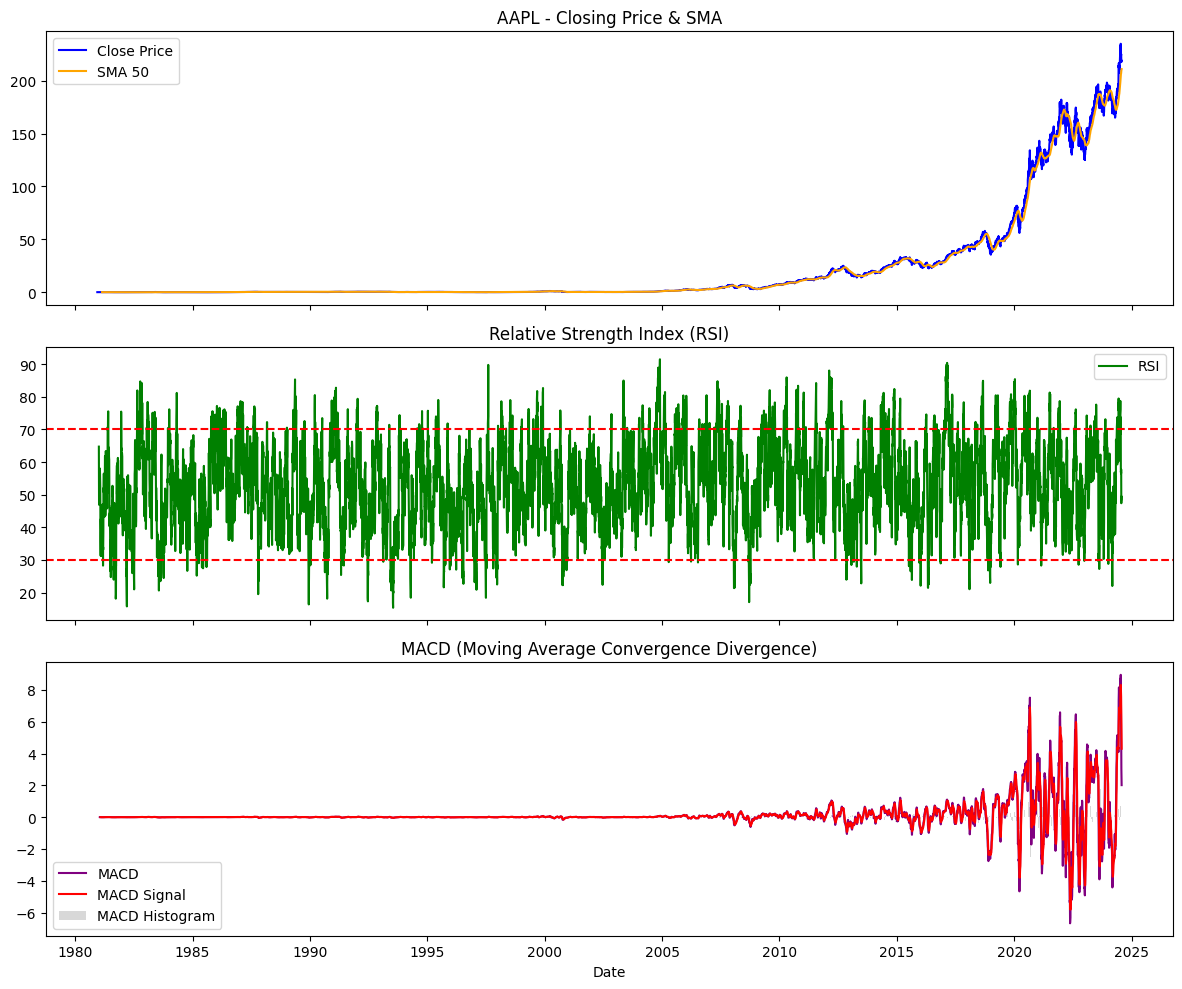

In [15]:
import matplotlib.pyplot as plt

# Plot stock data with indicators
def plot_stock_indicators(df, title):
    fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    # Plot Closing Price and SMA
    ax[0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
    ax[0].plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')
    ax[0].set_title(f"{title} - Closing Price & SMA")
    ax[0].legend()

    # Plot RSI
    ax[1].plot(df['Date'], df['RSI'], label='RSI', color='green')
    ax[1].axhline(70, color='red', linestyle='--')
    ax[1].axhline(30, color='red', linestyle='--')
    ax[1].set_title("Relative Strength Index (RSI)")
    ax[1].legend()

    # Plot MACD
    ax[2].plot(df['Date'], df['MACD'], label='MACD', color='purple')
    ax[2].plot(df['Date'], df['MACD_Signal'], label='MACD Signal', color='red')
    ax[2].bar(df['Date'], df['MACD'] - df['MACD_Signal'], label='MACD Histogram', color='gray', alpha=0.3)
    ax[2].set_title("MACD (Moving Average Convergence Divergence)")
    ax[2].legend()

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

# Example: Plot for AAPL
plot_stock_indicators(stock_data['AAPL'], "AAPL")
